## MACHINE LEARNING PROJECT

### PROBLEM STATEMENT

#### To predict the battery health of a laptop based on usage patterns, brand, model year, operating system and charging behavior

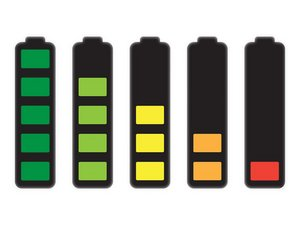

##### Dependent Variable:battery_health_percent
##### Independent Variables: brand, model_year, os, usage_type, daily_usage_hours, charging_cycles, avg_charge_limit_percent, battery_age_months, overheating_issues, performance_rating







###  IMPORT LIBRARIES



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


### DATA COLLECTION

In [2]:
data = pd.read_csv("laptop_battery_health_usage.csv",delimiter=',')

### DATA PREPROCESSING

In [3]:
data.head()

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,No,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,Yes,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,No,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,Yes,2


In [4]:
data.tail()

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
45,LB046,Lenovo,2018,Windows,Student,5,820,100,63,72,Yes,2
46,LB047,Asus,2021,Windows,Office,6,470,90,84,36,No,4
47,LB048,Acer,2020,Windows,Gaming,9,710,100,69,48,Yes,2
48,LB049,Apple,2021,macOS,Programming,7,380,80,92,36,No,5
49,LB050,HP,2023,Windows,Office,6,200,85,98,12,No,5


In [5]:
data.shape

(50, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   device_id                 50 non-null     object
 1   brand                     50 non-null     object
 2   model_year                50 non-null     int64 
 3   os                        50 non-null     object
 4   usage_type                50 non-null     object
 5   daily_usage_hours         50 non-null     int64 
 6   charging_cycles           50 non-null     int64 
 7   avg_charge_limit_percent  50 non-null     int64 
 8   battery_health_percent    50 non-null     int64 
 9   battery_age_months        50 non-null     int64 
 10  overheating_issues        50 non-null     object
 11  performance_rating        50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB


In [7]:
data.columns

Index(['device_id', 'brand', 'model_year', 'os', 'usage_type',
       'daily_usage_hours', 'charging_cycles', 'avg_charge_limit_percent',
       'battery_health_percent', 'battery_age_months', 'overheating_issues',
       'performance_rating'],
      dtype='object')

In [8]:
data.describe()

,model_year,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,performance_rating
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2020.560000,6.600000,526.400000,92.100000,80.16000,42.240000,3.580000
std,1.567007,1.498298,220.405563,6.857887,11.83278,18.118161,1.144463
min,2018.000000,4.000000,180.000000,80.000000,55.00000,12.000000,1.000000
25%,2019.250000,6.000000,342.500000,85.000000,72.50000,25.500000,3.000000
50%,2021.000000,6.000000,495.000000,90.000000,82.50000,38.000000,4.000000
75%,2022.000000,8.000000,695.000000,100.000000,90.00000,58.500000,4.750000
max,2023.000000,10.000000,950.000000,100.000000,98.00000,72.000000,5.000000


In [9]:
data.isnull().sum()

device_id                   0
brand                       0
model_year                  0
os                          0
usage_type                  0
daily_usage_hours           0
charging_cycles             0
avg_charge_limit_percent    0
battery_health_percent      0
battery_age_months          0
overheating_issues          0
performance_rating          0
dtype: int64

In [10]:
data.duplicated().sum() 

np.int64(0)

In [11]:
num_cols = data.select_dtypes(include=["int64", "float64"]).columns


In [12]:
cat_cols = data.select_dtypes(include=["object"]).columns


In [13]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())


In [14]:
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])


### FEATURE ENGINEERING

In [15]:
data["overheating_issues"] = data["overheating_issues"].map({"Yes": 1, "No": 0})
data.head()


,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,0,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,1,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,0,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,1,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,1,2


### FEATURE SELECTION

In [16]:
data = data.drop(columns=[
    "device_id",         
    "brand",            
    "os",                
    "performance_rating" 
])
data.columns


Index(['model_year', 'usage_type', 'daily_usage_hours', 'charging_cycles',
       'avg_charge_limit_percent', 'battery_health_percent',
       'battery_age_months', 'overheating_issues'],
      dtype='object')

In [17]:
# Independent variables (X)
X = data.drop("battery_health_percent", axis=1)

# Dependent variable (y)
y = data["battery_health_percent"]
print("Features Selected Successfully")



Features Selected Successfully


### FEATURE SCALING

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode usage_type
le = LabelEncoder()
data["usage_type"] = le.fit_transform(data["usage_type"])

# Split features and target
X = data.drop("battery_health_percent", axis=1)
y = data["battery_health_percent"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### TRAINING AND TESTING 

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape


((40, 7), (10, 7))

In [20]:
# Remove spaces & make columns lowercase
data.columns = data.columns.str.strip().str.lower()


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_cols = ["brand", "os", "usage_type", "overheating_issues"]

for col in categorical_cols:
    if col in data.columns:   # ✅ safety check
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le


In [22]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [23]:
print(data.columns)


Index(['model_year', 'usage_type', 'daily_usage_hours', 'charging_cycles',
       'avg_charge_limit_percent', 'battery_health_percent',
       'battery_age_months', 'overheating_issues'],
      dtype='object')


### MODEL SELECTION AND TRAINING

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
LR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
LR_Accuracy


99

In [25]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
DTR_Accuracy

93

In [26]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(X_test)) * 100)
SVR_Accuracy

65

In [27]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(X_test)) * 100)
RFR_Accuracy

93

In [28]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
from sklearn.metrics import r2_score
PR_Accuracy=round(r2_score(y_test, poly_model.predict(X_test_poly)) * 100)
PR_Accuracy

88

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)  # <- define rf_pred

# Train Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)  # <- define lr_pred

# Compare R2 Scores
from sklearn.metrics import r2_score

if r2_score(y_test, rf_pred) > r2_score(y_test, lr_pred):
    best_model = rf_model
    print("Random Forest is the Best Model")
else:
    best_model = lr_model
    print("Linear Regression is the Best Model")


Linear Regression is the Best Model


### MODEL PREDICTION AND EVALUATION and SAVE

In [30]:
import os
print(os.getcwd())


c:\Users\adhil\OneDrive\Desktop\laptop project


In [31]:
# Save feature names FIRST
feature_names = X.columns.tolist()

# Now dump everything
joblib.dump(model, "best_battery_health_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']

In [32]:
# ===============================
# Load saved objects
# ===============================
import pandas as pd
import joblib

model = joblib.load("best_battery_health_model.pkl")
scaler = joblib.load("scaler.pkl")
label_encoders = joblib.load("label_encoders.pkl")

# Load feature names safely
try:
    feature_names = joblib.load("feature_names.pkl")
except Exception:
    feature_names = list(model.feature_names_in_)

feature_names = [str(f) for f in feature_names]

# ===============================
# USER INPUT (NO usage_type)
# ===============================
input_dict = {
    "brand": "Dell",
    "model_year": 2021,
    "os": "Windows",
    "daily_usage_hours": 6,
    "charging_cycles": 450,
    "avg_charge_limit_percent": 80,
    "battery_age_months": 24,
    "overheating_issues": "No",
    "performance_rating": 4
}

input_df = pd.DataFrame([input_dict])

# ===============================
# Handle missing features safely
# ===============================
for col in feature_names:
    if col not in input_df.columns:
        if col in label_encoders:
            # categorical → first known category
            input_df[col] = label_encoders[col].classes_[0]
        else:
            # numeric → safe default
            input_df[col] = 0

# Arrange correct feature order
input_df = input_df[feature_names]

# ===============================
# Encode categorical columns safely
# ===============================
for col, encoder in label_encoders.items():
    if col in input_df.columns:
        val = str(input_df[col].iloc[0])

        # Handle unseen category
        if val not in encoder.classes_:
            val = encoder.classes_[0]

        input_df[col] = encoder.transform([val])

# ===============================
# Scale & Predict
# ===============================
input_scaled = scaler.transform(input_df)
prediction = model.predict(input_scaled)[0]

print("🔋 Predicted Battery Health (%):", round(prediction, 2))


🔋 Predicted Battery Health (%): 83.32


In [33]:
joblib.dump(best_model, "battery_health_prediction_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and Scaler Saved Successfully")


Model and Scaler Saved Successfully


In [34]:
# Remove the triple quotes before and after the training section
# Example dataset
data = pd.read_csv("laptop_battery_health_usage.csv")  # Your dataset path

# Feature columns
feature_order = [
    "brand", "model_year", "os", "usage_type",
    "daily_usage_hours", "charging_cycles", "avg_charge_limit_percent",
    "battery_age_months", "overheating_issues", "performance_rating"
]

X = data[feature_order]
y = data["battery_health_percent"]

# Encode categorical columns
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

# Save model, scaler, and encoders
joblib.dump(model, "best_battery_health_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")


C:\Users\adhil\AppData\Local\Temp\ipykernel_12844\2883497245.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\adhil\AppData\Local\Temp\ipykernel_12844\2883497245.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\adhil\AppData\Local\Temp\ipykernel_12844\2883497245.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


['label_encoders.pkl']

In [35]:
import pandas as pd
import joblib
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# ===============================
# Files to load/save
# ===============================
MODEL_FILE = "best_battery_health_model.pkl"
SCALER_FILE = "scaler.pkl"
ENCODERS_FILE = "label_encoders.pkl"
DATA_FILE = "laptop_battery_health_usage.csv"  # your dataset file

# ===============================
# Feature order
# ===============================
feature_order = [
    "brand",
    "model_year",
    "os",
    "usage_type",
    "daily_usage_hours",
    "charging_cycles",
    "avg_charge_limit_percent",
    "battery_age_months",
    "overheating_issues",
    "performance_rating"
]

# ===============================
# Load or train model
# ===============================
if os.path.exists(MODEL_FILE) and os.path.exists(SCALER_FILE) and os.path.exists(ENCODERS_FILE):
    model = joblib.load(MODEL_FILE)
    scaler = joblib.load(SCALER_FILE)
    label_encoders = joblib.load(ENCODERS_FILE)
else:
    print("Training model as files not found...")
    data = pd.read_csv(DATA_FILE)
    X = data[feature_order]
    y = data["battery_health_percent"]

    label_encoders = {}
    for col in X.select_dtypes(include='object').columns:
        le = LabelEncoder()
        X.loc[:, col] = le.fit_transform(X[col])
        label_encoders[col] = le

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    joblib.dump(model, MODEL_FILE)
    joblib.dump(scaler, SCALER_FILE)
    joblib.dump(label_encoders, ENCODERS_FILE)
    print("Model, scaler, and encoders saved!")

# ===============================
# Single Laptop Input
# ===============================
input_data = pd.DataFrame([{
    "brand": "Dell",
    "model_year": 2022,
    "os": "Windows",
    "usage_type": "Office",
    "daily_usage_hours": 5.0,
    "charging_cycles": 200,
    "avg_charge_limit_percent": 80.0,
    "battery_age_months": 12,
    "overheating_issues": 0,
    "performance_rating": 4
}])

for col, encoder in label_encoders.items():
    if input_data[col].dtype == object:
        if input_data[col].iloc[0] in encoder.classes_:
            input_data[col] = encoder.transform(input_data[col])
        else:
            raise ValueError(f"Unknown value '{input_data[col].iloc[0]}' for column '{col}'")

input_data = input_data[feature_order]
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)
print("✅ Predicted Battery Health Percentage:", round(prediction[0], 2))


✅ Predicted Battery Health Percentage: 93.61
